In [1]:
# Types of SVM
# 1) lINEAR SVM
# 2) NON-LINEAR SVM

In [2]:
# Hyperplane: there can be multiple lines/ decision boundaries to segregate the classes in n-dimensional space,
# but we need to find the best decision boundary that helps to classify the dat points.
# This best boundary is known as the hyperplane of SVM.

In [3]:
# Support Vectors : The data points or vectors that are the closest to the hyperplane and which affect the position
# of the hyperplane are termed as Support Vector. Since these vectors support the hypeplane,hence called Support vectors.


In [4]:
# data collection
# preprocessing
# visualization
# split
# algorithm implimentation

In [5]:
# data collection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as svm
from sklearn import metrics

In [6]:
import os
os.chdir("C:\\Users\\DELL\\Documents\\SAIRUSHI\\PYTHON")

In [7]:
df=pd.read_csv('recipes_muffins_cupcakes_scones.xlsx')

In [8]:
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [9]:
# preprocessing
df.head(10)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [10]:
df.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
20,Scone,29,3,46,6,0,11,0,6
21,Scone,19,3,36,3,14,7,14,5
22,Scone,20,5,52,5,10,3,0,5
23,Scone,19,6,50,5,6,10,0,3
24,Scone,19,10,51,5,0,10,0,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           25 non-null     object
 1   Flour          25 non-null     int64 
 2   Milk           25 non-null     int64 
 3   Sugar          25 non-null     int64 
 4   Butter         25 non-null     int64 
 5   Egg            25 non-null     int64 
 6   Baking Powder  25 non-null     int64 
 7   Vanilla        25 non-null     int64 
 8   Salt           25 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.9+ KB


In [12]:
df.isnull().sum()

Type             0
Flour            0
Milk             0
Sugar            0
Butter           0
Egg              0
Baking Powder    0
Vanilla          0
Salt             0
dtype: int64

In [13]:
df.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,39.360000,15.920000,23.080000,9.760000,6.960000,2.68000,0.960000,0.960000
std,11.316949,8.174758,14.183089,4.985646,3.713489,3.18486,2.761038,2.009975
min,19.000000,0.000000,3.000000,3.000000,0.000000,0.00000,0.000000,0.000000
25%,34.000000,11.000000,16.000000,6.000000,5.000000,1.00000,0.000000,0.000000
50%,39.000000,17.000000,20.000000,8.000000,6.000000,1.00000,0.000000,0.000000
75%,47.000000,23.000000,26.000000,12.000000,9.000000,2.00000,1.000000,0.000000
max,55.000000,28.000000,52.000000,20.000000,14.000000,11.00000,14.000000,6.000000


In [14]:
# correlation
df.corr()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
Flour,1.000000,0.793904,-0.920954,0.110890,-0.191987,-0.660232,-0.372895,-0.776007
Milk,0.793904,1.000000,-0.813199,-0.154863,-0.322662,-0.509946,-0.334281,-0.649380
Sugar,-0.920954,-0.813199,1.000000,-0.242486,-0.029999,0.711774,0.159687,0.828842
Butter,0.110890,-0.154863,-0.242486,1.000000,0.334789,-0.469500,-0.185366,-0.491633
Egg,-0.191987,-0.322662,-0.029999,0.334789,1.000000,-0.363999,0.467176,-0.162111
Baking Powder,-0.660232,-0.509946,0.711774,-0.469500,-0.363999,1.000000,0.216447,0.857092
Vanilla,-0.372895,-0.334281,0.159687,-0.185366,0.467176,0.216447,1.000000,0.352577
Salt,-0.776007,-0.649380,0.828842,-0.491633,-0.162111,0.857092,0.352577,1.000000


In [15]:
df.shape

(25, 9)

In [16]:
df.columns

Index(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'],
      dtype='object')

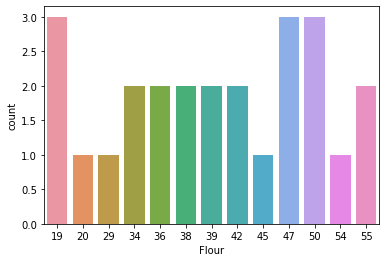

In [17]:
# visulization or analysis in graphical format
sns.countplot(x='Flour',data=df);

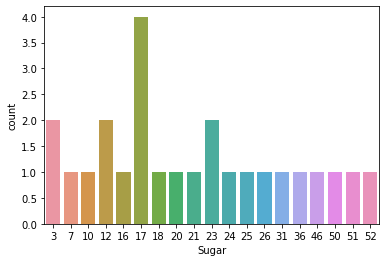

In [18]:
sns.countplot(x='Sugar',data=df);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


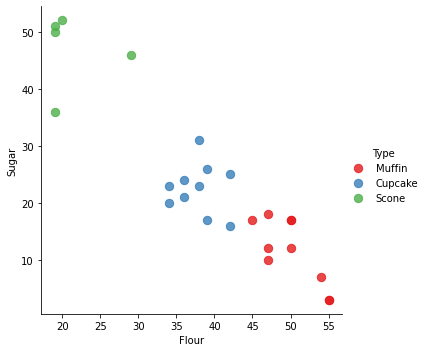

In [19]:
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.show()

In [20]:
# give the input variable x and output variable as y
x=df.iloc[0:,3]           # Sugar Column
y=df.iloc[0:,0]            # Type column

In [21]:
# split the data for training and testing categories
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [22]:
# specify input for the model
features =df[['Flour', 'Sugar']].to_numpy()           # change the dataframe to numpy array
label = np.where(df['Type'] == 'Muffin', 0, 1)       # np.where checks which value in TYPE columns is equal to given variable

In [23]:
# fit the model
from sklearn import svm
model = svm.SVC(kernel='linear') #creates a support vector machine (svm) object that is specifically for Support Vector Classification (SVC)
model.fit(features, label)
#We set the kernel parameter to 'linear' 
# which just ensures that the model separates the data linearly i.e. with a single hyperplane.

SVC(kernel='linear')

In [24]:
# Get the separating hyperplane
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a*xx-(model.intercept_[0]/w[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


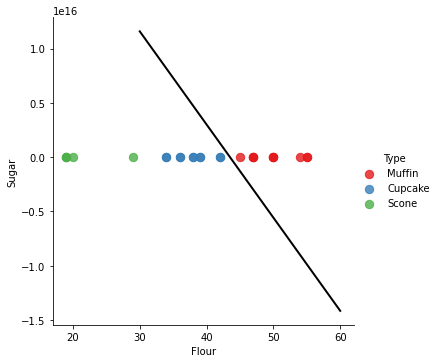

In [25]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
 

In [26]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


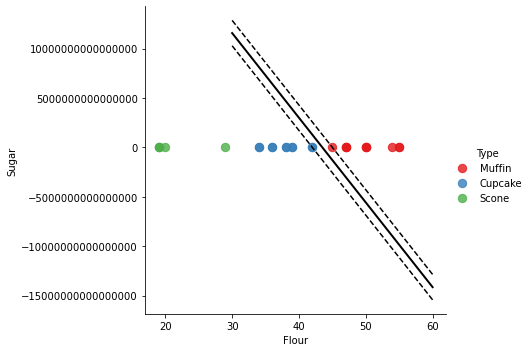

As you can see we have our hyperplane which separates our muffins from our cupcakes.


In [27]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none');
 
plt.ticklabel_format(style='plain', axis='y')# We can see the real values on the y-axis by changing the format of the numbers
    # here it was showing 1^16 times on y axis
plt.show()
print('As you can see we have our hyperplane which separates our muffins from our cupcakes.')

As you can see, the values on the y-axis are huge which is why the support vectors appear to be on top of each other at y = 0.

This is not actually the case, the scale is just so big that they appear relatively close together.

Before we had a nice spaced out plot but when we created our hyperplane line, the scale increased.

Basically, the algorithm tried to create a hyperplane line with no misclassification. If you look at the original data graph, you can see that if we tried to draw a line to separate the data, keeping all the blues on one side and all the reds on another, it would have to be almost completely vertical.

This is what our algorithm did. When we display the data with the hyperplane, the line will always try to be perfectly diagonal across our graph which is why the data gets scaled and appears flattened.

If you remember how supervised learning algorithms work, you may be confused why we fed all of our data into the training set and didn't creating a testing set.

Well technically you do not need a testing set to create a machine learning model. The training set is used to fit the model while the testing set is just for our own usage, to evaluate how good the model is.

Now it is recommended that whenever you create a supervised learning model, you create a testing set and calculate the accuracy. However, we are instead going to create a function that will allow us to feed test data into it and will use the model to tell us what the output is.

In this case, our function will take in two arguments: the percentage of flour in a recipe and the percentage of sugar in a recipe.

It will then tell us whether the recipe is for a muffin or a cupcake.

In [27]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')          

As you can see, we have the muffin_or_cupcake function that takes two arguments.

We we pass the arguments into the model.predict() function and check if the model predicts a 0.

Remember that earlier when we created our label array, we used a value of 0 for muffins and a value of 1 for cupcakes.

Therefore if the model predicts a 0, the function tells us that the recipe is for muffins. Otherwise the function will tell us that the recipe is for cupcakes.

Let's try out this function using a recipe with 50% flour and 20% sugar.


In [28]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


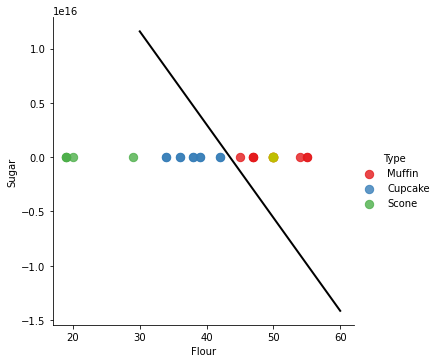

In [29]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour','Sugar',data=df,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s": 70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(50,20,'yo',markersize='9')
plt.show()

In [30]:
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


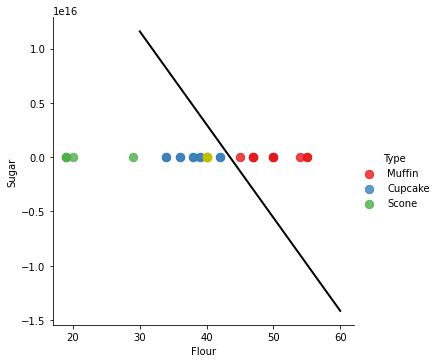

In [31]:
sns.lmplot('Flour','Sugar',data=df,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s": 70})
plt.plot(xx,yy,linewidth=2,color='black')
plt.plot(40,20,'yo',markersize='9')
plt.show()

Amazing! You now have a working function that uses the model to predict whether a recipe is a muffin or a cupcake based soleley on its flour and sugar contents.